# 일반편

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [65]:
df = pd.read_csv("./tr_mod.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
len(df)

891

## 남자/여자별 승객수 분석 
## 객실 등급별 승객수 분석 

In [7]:
from functools import *

In [11]:
def count_columns(result_dic, element) :
    if result_dic.get(element) :
        result_dic[element] += 1
    else:
        result_dic[element] = 1

    return result_dic

"""
#data.get(key)=value
def count(data,key):
    if data.get(key):
        data[key]+=1 
    else:
        data[key]=1
    return data 

#reduce(count,data,{})
"""



def get_group_count(df_column) :
    return reduce(count_columns, df_column, dict())

In [12]:
result = get_group_count(df['Sex'])
result

{'male': 577, 'female': 314}

In [13]:
result = get_group_count(df['Pclass'])
result

{3: 491, 1: 216, 2: 184}

In [14]:
len(df['Sex'][df.Sex=='female'])

314

## 남자/여자 & 객실 등급별 승객수 분석

result = {
    "male" : {
        1 : 0,
        2 : 0, 
        3 : 0
    }, 
    "female" : {
        1 : 0,
        2 : 0, 
        3 : 0
    }
}
형태로 나타내기

In [17]:
df_columns = []

for idx in range(len(df)):
    element = df['Sex'][idx], df['Pclass'][idx]
    df_columns.append(element)
    
len(df_columns)

891

In [20]:
df_columns[:10]

[('male', 3),
 ('female', 1),
 ('female', 3),
 ('female', 1),
 ('male', 3),
 ('male', 3),
 ('male', 1),
 ('male', 3),
 ('female', 3),
 ('female', 2)]

In [18]:
def get_group_count(df_columns) :
    
    print('len(df_columns) :', len(df_columns))
    
    def count_columns(result_dic, element_tuple) :
        element1, element2 = element_tuple
        # print(element1, ':', element2)

        if not (result_dic.get(element1)) :
            result_dic[element1] = {}
              
        if result_dic[element1].get(element2) :
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1

        return result_dic
    
    result = reduce(count_columns, df_columns, dict())
    return result

In [19]:
result = get_group_count(df_columns) 
result

len(df_columns) : 891


{'male': {3: 347, 1: 122, 2: 108}, 'female': {1: 94, 3: 144, 2: 76}}

In [21]:
dict_element = result['female']
dict_element

{1: 94, 3: 144, 2: 76}

In [22]:
dict_values = [dict_element[key] for key in dict_element.keys()] 
dict_values

[94, 144, 76]

In [23]:
sum(dict_values)

314

In [24]:
count_f = []
count_m = []

for i in range(3):
    idx = i+1
    count_f.append(result['female'][idx])
    count_m.append(result['male'][idx])

In [25]:
count_f, count_m

([94, 76, 144], [122, 108, 347])

## 데이터 분석결과 시각화

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

### 각각의 데이터 셋을 보는 방법

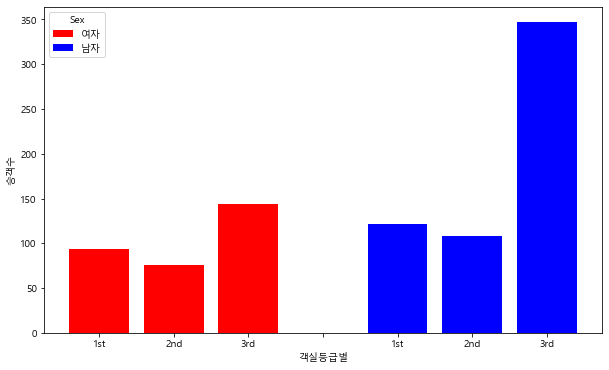

In [29]:
f = [ 1, 2, 3 ]
m = [ 5, 6, 7 ]

plt.bar(f, count_f, color='r', label='여자')
plt.bar(m, count_m, color='b', label='남자')
plt.xlabel('객실등급별')
plt.ylabel('승객수')
plt.legend(title='Sex')

t = list(range(1,8))
plt.xticks(t , ('1st','2nd','3rd','','1st','2nd','3rd'))   #x축에 두는 요소 이름
plt.show()

In [28]:
count_p1 = count_f[0], count_m[0]
count_p2 = count_f[1], count_m[1]
count_p3 = count_f[2], count_m[2]

count_p1, count_p2, count_p3

((94, 122), (76, 108), (144, 347))

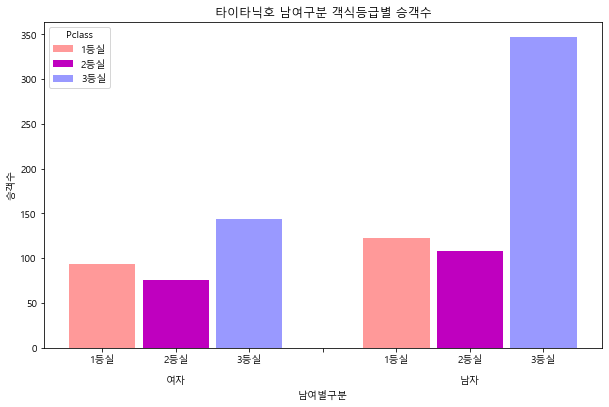

In [37]:
t1 = [ 1, 5 ] #t1=[ f[0],m[0] ]
t2 = [ 2, 6 ]
t3 = [ 3, 7 ]

plt.figure(figsize=(10,6))
plt.bar(t1, count_p1, color='r',alpha=0.4, width=0.9, label='1등실')
plt.bar(t2, count_p2, color='m', width=0.9, label='2등실')
plt.bar(t3, count_p3, color='b',alpha=0.4, width=0.9, label='3등실')

plt.title('타이타닉호 남여구분 객식등급별 승객수')
plt.xlabel('남여별구분')
plt.ylabel('승객수')
plt.legend(title='Pclass')

t = list(range(1,8))
# set the locations of the xticks

#plt.xticks(t , ('','여자','','','','남자',''))
plt.xticks(t , ('1등실','2등실\n\n여자','3등실','','1등실','2등실\n\n남자','3등실'))

plt.show()

### 각각의 데이터 셋을 하나로 합쳐서 보기

In [38]:
from pandas import Series, DataFrame

In [39]:
#파일에서 필요한 데이터 셋만 뽑아오기
df_tmp = DataFrame({
            'Sex' : df.Sex,
            'Pclass' : df.Pclass
        })

df_tmp.head(10)

,Sex,Pclass
0,male,3
1,female,1
2,female,3
3,female,1
4,male,3
5,male,3
6,male,1
7,male,3
8,female,3
9,female,2


In [41]:
df_tmp_f = df_tmp[df_tmp.Sex=='female']
df_tmp_f.head()

,Sex,Pclass
1,female,1
2,female,3
3,female,1
8,female,3
9,female,2


In [42]:
df_tmp_f1 = df_tmp_f[df_tmp_f.Pclass==1]
df_tmp_f1.head()

,Sex,Pclass
1,female,1
3,female,1
11,female,1
31,female,1
52,female,1


In [40]:
len(df[df.Sex=='female'][df.Pclass==1])

C:\Users\202-006\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


94

In [43]:
df_tmp_f = df_tmp[df_tmp.Sex=='female']
df_tmp_f1 = df_tmp_f[df_tmp_f.Pclass==1]
len(df_tmp_f1)

94

In [44]:
df_tmp_f1[::10]# 처음에서 10칸씩 띄고 마지막추가

"""
for i in  df_tmp_f1:
    if (i%10==0) or (i==len(df_tmp_f1)-1):
        print(df_tmp_f1[i])
"""

,Sex,Pclass
1,female,1
177,female,1
269,female,1
311,female,1
369,female,1
498,female,1
571,female,1
700,female,1
781,female,1
862,female,1


In [45]:
#새로운 열 추가
df_tmp['Category'] = ""
df_tmp.head()

,Sex,Pclass,Category
0,male,3,
1,female,1,
2,female,3,
3,female,1,
4,male,3,


In [46]:
df_tmp.index

RangeIndex(start=0, stop=891, step=1)

In [47]:
for i in  df_tmp.index:
    pclass = df_tmp['Pclass'][i]
    sex    = df_tmp['Sex'][i]
    category = '{}:{}'.format(pclass, sex)
    
    if (i%100==0) or (i==len(df_tmp)-1):  print(i, '\t=>', category)
        
    # df_tmp['Category'][i] = category
    df_tmp.Category[i] = category

0 	=> 3:male


C:\Users\202-006\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


100 	=> 3:female
200 	=> 3:male
300 	=> 3:female
400 	=> 3:male
500 	=> 3:male
600 	=> 2:female
700 	=> 1:female
800 	=> 2:male
890 	=> 3:male


In [48]:
df_tmp['Category'].unique()

array(['3:male', '1:female', '3:female', '1:male', '2:female', '2:male'],
      dtype=object)

In [49]:
len(df_tmp[df_tmp['Category']=='1:female'])

94

In [50]:
count_f = []
count_f.append(len(df_tmp[df_tmp['Category']=='1:female']))
count_f.append(len(df_tmp[df_tmp['Category']=='2:female']))
count_f.append(len(df_tmp[df_tmp['Category']=='3:female']))

count_f

[94, 76, 144]

In [51]:
# count_all = count_f.copy()
count_all = [0]
count_all.extend(count_f)
count_all.append(0)
count_all.extend(count_m)
count_all

[0, 94, 76, 144, 0, 122, 108, 347]

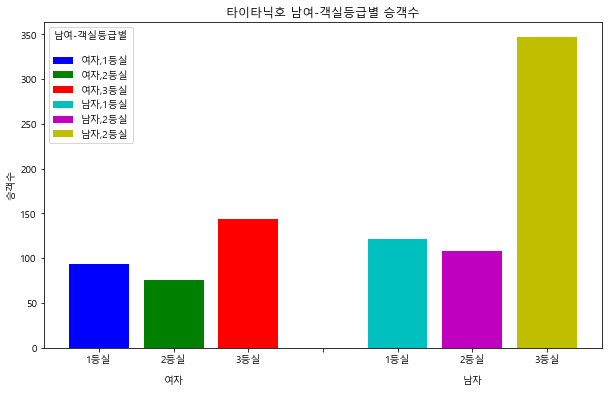

In [52]:
plt.figure(figsize=(10,6))

colors = ['w' , 'b', 'g', 'r', 'w', 'c', 'm', 'y', 'w', 'k' ]
labels = ['', '여자,1등실', '여자,2등실', '여자,3등실', '', '남자,1등실', '남자,2등실', '남자,2등실']
# xticks = ('', '여자','','','','남자','' )
xticks = ('1등실', '2등실\n\n여자','3등실','','1등실','2등실\n\n남자','3등실' )
t = list(range(1,8))

for idx in range(1, 8):
    plt.bar(idx, count_all[idx], color=colors[idx], width=0.8, label=labels[idx])

plt.title('타이타닉호 남여-객실등급별 승객수')
plt.ylabel('승객수')
plt.legend(title='남여-객실등급별\n')

plt.xticks(t , xticks)   # set the locations of the xticks
plt.show()

# 고급편

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv("./tr_mod.csv")

#### 과제1 : 남자/여자 수, 객실 등급별 수

In [59]:
df.groupby("Sex").size()

Sex
female    314
male      577
dtype: int64

In [60]:
df.groupby(["Pclass", "Sex"]).size()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

In [61]:
df.groupby(["Sex", "Pclass"]).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

#### 과제2 : 연령대별 수 ( 10대 : OO명, 20대 : OO명, 30대 : OO명 )

In [66]:
import math

In [68]:
# df.Age.dropna() : NAN값 삭제
# df.Age.dropna().apply(lambda x:str(x)[:1])

age_series = df.Age.dropna().apply(lambda age: math.floor(age / 10) * 10)
age_series.name = "Age_Group"

In [69]:
age_series[:20]

0     20
1     30
2     20
3     30
4     30
5     20
6     50
7      0
8     20
9     10
10     0
11    50
12    20
13    30
14    10
15    50
16     0
17    20
18    30
19    20
Name: Age_Group, dtype: int64

In [70]:
df = pd.concat(
    [df, age_series],
    axis=1,
)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q,20
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10


In [71]:
df.Age_Group = df.Age_Group.fillna("확인불명")

In [72]:
age_group_df = df.groupby("Age_Group").size()
age_group_df

Age_Group
0      62
10    102
20    397
30    167
40     89
50     48
60     19
70      6
80      1
dtype: int64

In [76]:
df.groupby("Pclass").size()

Pclass
1    216
2    184
3    491
dtype: int64

In [73]:
df.groupby("Pclass").agg({"Survived": "mean"})  #Pclass별 생존율

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [75]:
df.groupby("Pclass").agg({"Survived": "sum"}) #Pclass별 생존자 수

,Survived
Pclass,
1,136
2,87
3,119


In [77]:
136/216, 87/184, 119/491

(0.6296296296296297, 0.47282608695652173, 0.24236252545824846)

## pd.crosstab : Compute a simple cross-tabulation of two (or more) factors.  

## 수 관련, 합관련

Signature: pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, dropna=True, normalize=False)
Docstring:
Compute a simple cross-tabulation of two (or more) factors. By default
computes a frequency table of the factors unless an array of values and an
aggregation function are passed

In [78]:
pd.crosstab(
    df.Sex,
    df.Pclass,
    margins=True,
)  

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [79]:
pd.crosstab(
    df.Sex,
    df.Pclass,
    margins=False,
)  

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


## df.pivot_table : Create a spreadsheet-style pivot table as a DataFrame 

## 비율 관련

Signature: df.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
Docstring:
Create a spreadsheet-style pivot table as a DataFrame. The levels in the
pivot table will be stored in MultiIndex objects (hierarchical indexes) on
the index and columns of the result DataFrame

In [80]:
df.pivot_table(
    "Survived",
    "Sex",
    "Pclass",     # aggfunc="mean" ( 생존률 ); ( 매출: SUM )
)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [82]:
df.groupby(["Pclass", "Sex"]).size().unstack(1)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [81]:
temp_df = df.groupby(["Pclass", "Sex"]).size().unstack(0)
temp_df

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [86]:
# temp_df.sum(axis=1)
result_df =temp_df.div(temp_df.sum(axis=1), axis=0) 
#temp_df.div(앞,뒤) 
#앞에 수 % 뒤의 수

#'female': {1: 94, 3: 144, 2: 76}}
#여자 전체 314

#0.299363 = 94/314

# 비율을 연산하는 과정                .sum() => .div()
result_df

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


In [87]:
? temp_df.div
#temp_df.div(other, axis='columns', level=None, fill_value=None)

# 데이터 시각화

## matplotlib.pyplot style

In [88]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

%matplotlib inline

In [89]:
plt.rcParams['figure.figsize'] = (12,8)

In [91]:
# temp_df.sum(axis=1)
result_df =temp_df.div(temp_df.sum(axis=1), axis=0) 
#temp_df.div(앞,뒤) 
#앞에 수 % 뒤의 수

#'female': {1: 94, 3: 144, 2: 76}}
#여자 전체 314

#0.299363 = 94/314

# 비율을 연산하는 과정                .sum() => .div()
result_df

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


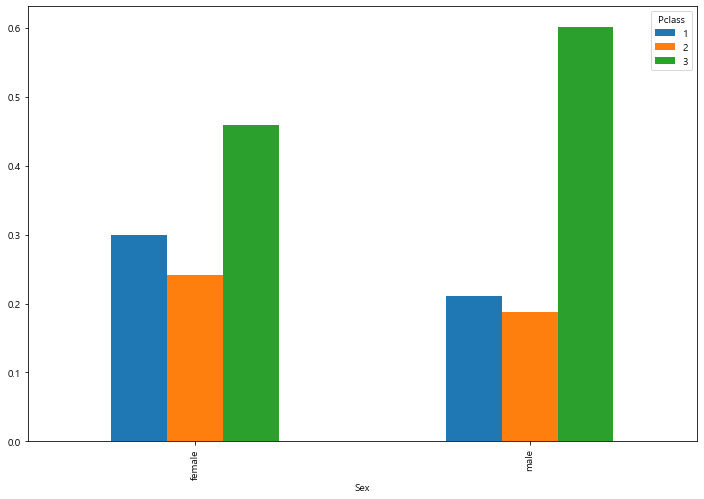

In [92]:
bar_plot = result_df.plot.bar();

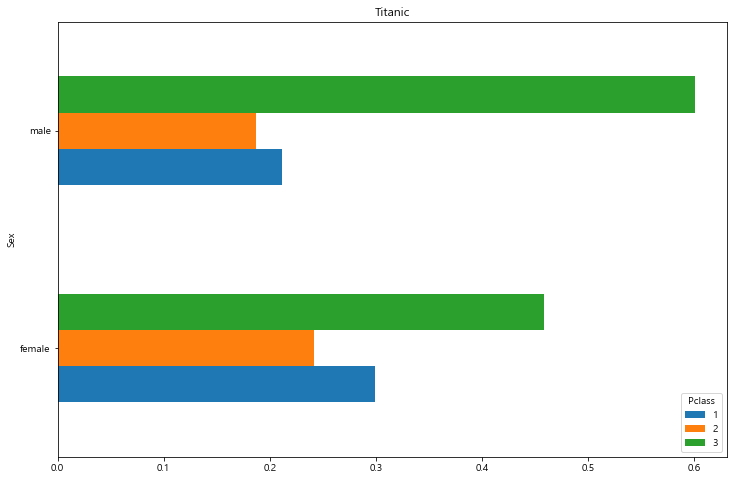

In [93]:
result_df.plot(kind="barh", title="Titanic");

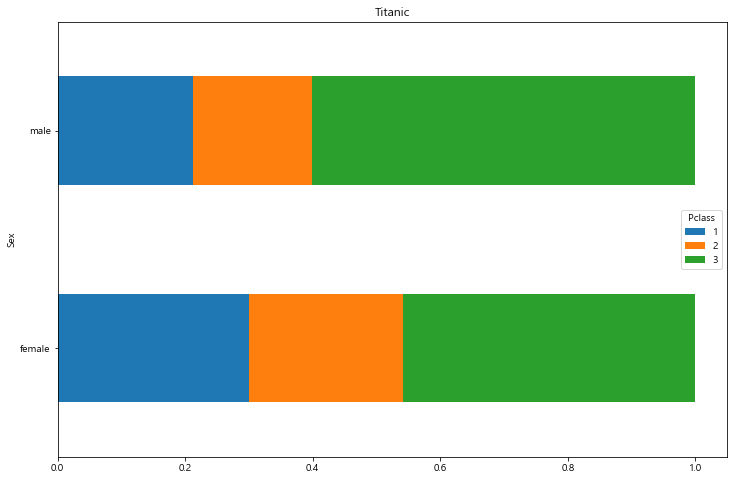

In [94]:
result_df.plot(kind="barh", title="Titanic", stacked=True);


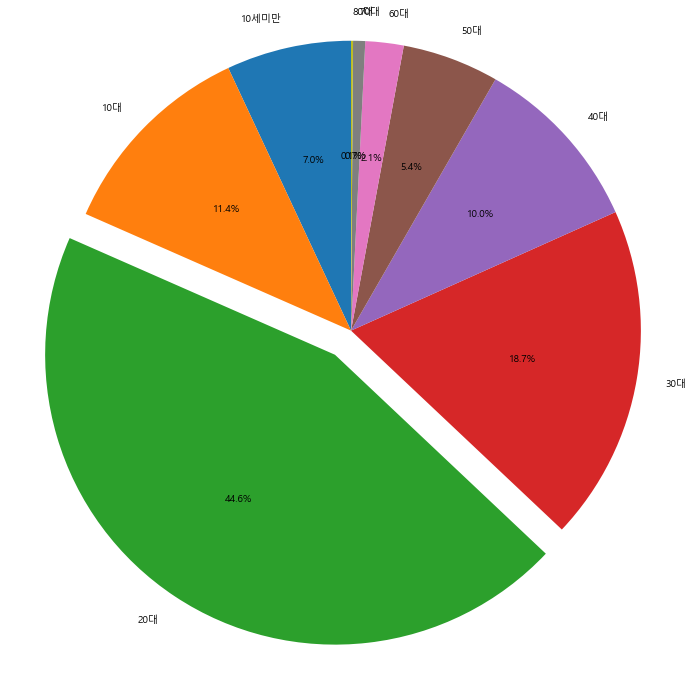

In [100]:
plt.rcParams['figure.figsize'] = (12,12)

labels = list(age_group_df.index)
labels = ['10세미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']
sizes  = list(age_group_df.values)
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
